In [354]:
import pandas as pd
import datetime

In [355]:
df_1=pd.read_csv("bops_bm.csv")
df_2=pd.read_csv("bops_online.csv")

In [356]:
df_1.head()

,id (store),year,month,week,usa,after,sales,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1.0,2011.0,4.0,16.0,0.0,0.0,"118,691",NaN,NaN,NaN,NaN
1,1.0,2011.0,4.0,17.0,0.0,0.0,"113,804",NaN,NaN,NaN,NaN
2,1.0,2011.0,4.0,18.0,0.0,0.0,"172,104",NaN,NaN,NaN,NaN
3,1.0,2011.0,5.0,19.0,0.0,0.0,"105,591",NaN,NaN,NaN,NaN
4,1.0,2011.0,5.0,20.0,0.0,0.0,"94,884",NaN,NaN,NaN,NaN


In [357]:
df_2.head()

,id (DMA),year,month,week,after,close,sales,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1,2011,4,17,0,1,"18,564",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2011,4,18,0,1,"30,883",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2011,5,19,0,1,"37,425",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2011,5,20,0,1,"32,563",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2011,5,21,0,1,"35,773",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [358]:
df_1=df_1.drop(["Unnamed: 7","Unnamed: 8","Unnamed: 9","Unnamed: 9","Unnamed: 10"],axis=1)
df_2=df_2.drop(["Unnamed: 7","Unnamed: 8","Unnamed: 9","Unnamed: 9","Unnamed: 10","Unnamed: 11","Unnamed: 12","Unnamed: 13","Unnamed: 14","Unnamed: 15","Unnamed: 16"],axis=1)

In [359]:
len(df_1),len(df_2)

(4538, 10710)

In [360]:
df_1.isnull().sum()

id (store)    2
year          2
month         2
week          2
usa           2
after         2
 sales        2
dtype: int64

In [361]:
df_2.isnull().sum()

id (DMA)    0
year        0
month       0
week        0
after       0
close       0
 sales      0
dtype: int64

In [362]:
df_1=df_1.dropna()
df_2=df_2.dropna()

In [363]:
len(df_1),len(df_2)

(4536, 10710)

In [364]:
df_1.columns=[columna.strip() for columna in list(df_1.columns)]
df_2.columns=[columna.strip() for columna in list(df_2.columns)]

In [365]:
week_1=df_1["week"].astype("int").astype("str")
week_2=df_2["week"].astype("int").astype("str")
month_1=df_1["month"].astype("int").astype("str")
month_2=df_2["month"].astype("int").astype("str")
year_1=df_1["year"].astype("int").astype("str")
year_2=df_2["year"].astype("int").astype("str")

In [366]:
df_1["sales"]=df_1["sales"].str.replace(',','').astype("int")
df_2["sales"]=df_2["sales"].str.replace(',','').astype("int")

In [367]:
df_1["month year"]=month_1+"-"+year_1
df_2["month year"]=month_2+"-"+year_2

In [368]:
def convert_date(string):
    month=int(string.split("-")[0])
    year=int(string.split("-")[1])
    date=datetime.datetime(year, month, 1)
    return date

In [369]:
df_1["month year"]=df_1["month year"].apply(convert_date)
df_2["month year"]=df_2["month year"].apply(convert_date)

In [370]:
time_dataframe_1=df_1.groupby('month year').mean()
time_dataframe_2=df_2.groupby('month year').mean()

In [371]:
time_dataframe_1["month year"]=time_dataframe_1.index
time_dataframe_2["month year"]=time_dataframe_2.index

In [372]:
time_dataframe_1.index=[i for i in range(len(time_dataframe_1))]
time_dataframe_2.index=[i for i in range(len(time_dataframe_2))]

In [373]:
time_dataframe_1.sort_values(by="month year",ascending=True)
time_dataframe_2.sort_values(by="month year",ascending=True)

,id (DMA),year,month,week,after,close,sales,month year
0,105.5,2011.0,4.0,17.5,0.0,0.480952,14800.907143,2011-04-01
1,105.5,2011.0,5.0,21.0,0.0,0.480952,16373.603810,2011-05-01
2,105.5,2011.0,6.0,25.5,0.0,0.480952,15653.819048,2011-06-01
3,105.5,2011.0,7.0,29.5,0.0,0.480952,13410.248810,2011-07-01
4,105.5,2011.0,8.0,34.0,0.0,0.480952,13802.315238,2011-08-01
5,105.5,2011.0,9.0,38.5,0.0,0.480952,14704.534524,2011-09-01
6,105.5,2011.0,10.0,43.0,0.6,0.480952,14275.979048,2011-10-01
7,105.5,2011.0,11.0,47.5,1.0,0.480952,21881.446429,2011-11-01
8,105.5,2011.0,12.0,51.5,1.0,0.480952,15126.198810,2011-12-01
9,105.5,2012.0,1.0,3.5,1.0,0.480952,9364.189683,2012-01-01


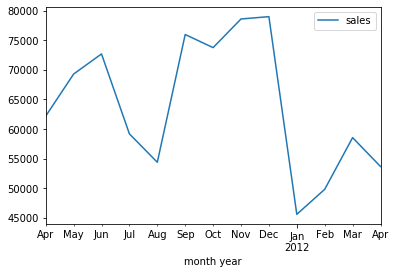

In [374]:
time_dataframe_1.plot(x="month year",y="sales");

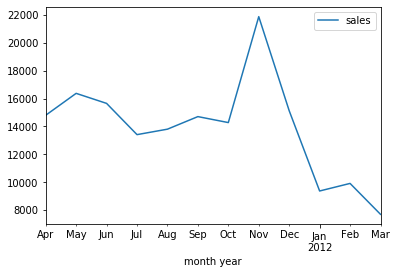

In [375]:
time_dataframe_2.plot(x="month year",y="sales");

id (store)	Store identification code\
year	Year\
month	Month (January = 1)\
week	Week (first week of the year = 1)\
usa	Equal to 1 if store is in the USA; 0 if it is a Canadian store\
after	Equal to 1 if week is after introduction of BOPS; 0 otherwise\
sales 	Total B&M sales for the week for the store

In [376]:
df_1.dtypes

id (store)           float64
year                 float64
month                float64
week                 float64
usa                  float64
after                float64
sales                  int64
month year    datetime64[ns]
dtype: object

In [377]:
df_2.dtypes

id (DMA)               int64
year                   int64
month                  int64
week                   int64
after                  int64
close                  int64
sales                  int64
month year    datetime64[ns]
dtype: object

In [378]:
df_1.columns

Index(['id (store)', 'year', 'month', 'week', 'usa', 'after', 'sales',
       'month year'],
      dtype='object')

In [380]:
lst=['id (store)', 'year', 'month', 'week', 'usa', 'after']
for columna in lst:
    df_1[columna]=df_1[columna].astype("int")

In [381]:
df_1.dtypes

id (store)             int64
year                   int64
month                  int64
week                   int64
usa                    int64
after                  int64
sales                  int64
month year    datetime64[ns]
dtype: object

In [382]:
df_1.head()

,id (store),year,month,week,usa,after,sales,month year
0,1,2011,4,16,0,0,118691,2011-04-01
1,1,2011,4,17,0,0,113804,2011-04-01
2,1,2011,4,18,0,0,172104,2011-04-01
3,1,2011,5,19,0,0,105591,2011-05-01
4,1,2011,5,20,0,0,94884,2011-05-01


In [383]:
df_2.head()

,id (DMA),year,month,week,after,close,sales,month year
0,1,2011,4,17,0,1,18564,2011-04-01
1,1,2011,4,18,0,1,30883,2011-04-01
2,1,2011,5,19,0,1,37425,2011-05-01
3,1,2011,5,20,0,1,32563,2011-05-01
4,1,2011,5,21,0,1,35773,2011-05-01


In [384]:
df_2["sales"]=df_2["sales"].apply(entero)

In [385]:
df_2.dtypes

id (DMA)               int64
year                   int64
month                  int64
week                   int64
after                  int64
close                  int64
sales                  int64
month year    datetime64[ns]
dtype: object

# sales in store

In [386]:
usa_store_before=df_1[(df_1["after"]==0) & (df_1["usa"]==1)] #usa

In [387]:
len(usa_store_before)

1809

In [388]:
sum(list(usa_store_before["sales"]))

122730695

In [389]:
usa_store_after=df_1[(df_1["after"]==1) & (df_1["usa"]==1)] #usa

In [390]:
len(usa_store_after)

1809

In [391]:
sum(list(usa_store_after["sales"]))

110455609

Ventas en tiendas en USA

In [392]:
before=sum(list(usa_store_before["sales"]))
after=sum(list(usa_store_after["sales"]))
"disminuyeron un {}%".format(((after-before)/after)*100)

'disminuyeron un -11.113139578090598%'

In [393]:
canada_store_before=df_1[(df_1["after"]==0) & (df_1["usa"]==0)] #canada

In [394]:
len(canada_store_before)

459

In [395]:
canada_store_after=df_1[(df_1["after"]==1) & (df_1["usa"]==0)] #canada

In [396]:
len(canada_store_after)

459

In [397]:
sum(list(canada_store_before["sales"]))

30689777

In [398]:
sum(list(canada_store_after["sales"]))

25853285

Ventas en tiendas en Canada

In [399]:
before_c=sum(list(canada_store_before["sales"]))
after_c=sum(list(canada_store_after["sales"]))
"disminuyeron un {}%".format(((after_c-before_c)/before_c)*100)

'disminuyeron un -15.75929339597352%'

# 1. ¿Deberían expandirse a Canadá?

No, las ventas diminuyeron un 15.7% en Canadá después de que se introdujera el BOPS en USA

# sales online

id (DMA)	Designated Market Area (DMA) identification code\
year	Year\
month	Month number (January =1)\
week	Week number (first week of the year = 1)\
after	Equal to 1 if week is after introduction of BOPS; 0 otherwise\
close	Equal to 1 if week is DMA is within 50 miles of a store; 0 otherwise\
sales 	Total online sales for the week for the DMA in dollars

DMA is a region of the country in which radio and \
television stations in the major city of the area are seen in homes and households

In [400]:
df_2.head()

,id (DMA),year,month,week,after,close,sales,month year
0,1,2011,4,17,0,1,18564,2011-04-01
1,1,2011,4,18,0,1,30883,2011-04-01
2,1,2011,5,19,0,1,37425,2011-05-01
3,1,2011,5,20,0,1,32563,2011-05-01
4,1,2011,5,21,0,1,35773,2011-05-01


DMA is within 50 miles of a store

In [401]:
close_online_before=df_2[(df_2["after"]==0) & (df_2["close"]==1)]

In [402]:
close_online_before

,id (DMA),year,month,week,after,close,sales,month year
0,1,2011,4,17,0,1,18564,2011-04-01
1,1,2011,4,18,0,1,30883,2011-04-01
2,1,2011,5,19,0,1,37425,2011-05-01
3,1,2011,5,20,0,1,32563,2011-05-01
4,1,2011,5,21,0,1,35773,2011-05-01
...,...,...,...,...,...,...,...,...
10629,209,2011,9,38,0,1,800,2011-09-01
10630,209,2011,9,39,0,1,1723,2011-09-01
10631,209,2011,9,40,0,1,2093,2011-09-01
10632,209,2011,10,41,0,1,1568,2011-10-01


In [403]:
len(close_online_before)

2626

In [404]:
close_online_after=df_2[(df_2["after"]==1) & (df_2["close"]==1)]

In [405]:
close_online_after

,id (DMA),year,month,week,after,close,sales,month year
26,1,2011,10,43,1,1,26997,2011-10-01
27,1,2011,10,44,1,1,27522,2011-10-01
28,1,2011,10,45,1,1,19164,2011-10-01
29,1,2011,11,46,1,1,16667,2011-11-01
30,1,2011,11,47,1,1,39513,2011-11-01
...,...,...,...,...,...,...,...,...
10654,209,2012,2,10,1,1,3335,2012-02-01
10655,209,2012,3,11,1,1,2164,2012-03-01
10656,209,2012,3,12,1,1,1822,2012-03-01
10657,209,2012,3,13,1,1,1880,2012-03-01


In [406]:
len(close_online_after)

2525

In [407]:
"diminuyeron un {}%".format(100-sum(list(close_online_after["sales"]))/sum(list(close_online_before["sales"]))*100)

'diminuyeron un 18.734937552406322%'

In [408]:
0.187*sum(list(close_online_before["sales"]))

6748938.834

DMA is farther than 50 miles of a store

In [409]:
far_online_before=df_2[(df_2["after"]==0) & (df_2["close"]==0)]

In [410]:
len(far_online_before)

2834

In [411]:
far_online_after=df_2[(df_2["after"]==1) & (df_2["close"]==0)]

In [99]:
len(far_online_after)

2725

In [105]:
"diminuyeron un {}%".format(100-sum(list(far_online_after["sales"]))/sum(list(far_online_before["sales"]))*100)

'diminuyeron un 15.44025431321515%'

In [106]:
0.154*sum(list(far_online_before["sales"]))

6834216.928

# 2. ¿Cuántos millones de dólares se ganaron o perdieron a partir del programa? Explica tu razonamiento y metodología.

Se asumio que si el BOPS no se hubiera implementado el mismo total de dólares en ventas se hubiera producido
las ventas bajaron un 15.4% en tiendas lejanas a DMA, bajaron un 18.7% en tiendas cercanas,
bajaron un 10% en USA y un 15.7% en Canadá.

In [59]:
antes=df_1[df_1["after"]==0]["sales"].sum()+df_2[df_2["after"]==0]["sales"].sum()
despues=df_1[df_1["after"]==1]["sales"].sum()+df_2[df_2["after"]==1]["sales"].sum()

In [60]:
antes-despues

30725207

Se perdieron 30,725,207 dólares se perdieron